In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import plotnine as pl

In [101]:
advertising = pd.read_csv('advertising.csv')


In [102]:
advertising.columns = ['daily_time_on_site', 'age','area_income', 'daily_internet_usage', 'ad_topic_line', 'city',
                      'gender', 'country', 'timestamp', 'clicked']
advertising.head(n=5)

,daily_time_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,gender,country,timestamp,clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [103]:
# there does not seem to be any null values or missing values
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
daily_time_on_site      1000 non-null float64
age                     1000 non-null int64
area_income             1000 non-null float64
daily_internet_usage    1000 non-null float64
ad_topic_line           1000 non-null object
city                    1000 non-null object
gender                  1000 non-null int64
country                 1000 non-null object
timestamp               1000 non-null object
clicked                 1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [104]:
len(advertising.country.unique())

237

In [105]:
advertising.groupby('country').size().head(n=5)

country
Afghanistan       8
Albania           7
Algeria           6
American Samoa    5
Andorra           2
dtype: int64

In [106]:
len(advertising.city.unique()) 
# each data point seems to be almost from a unique country and city combination. not enough data points to understand 
# on a per country level


969

In [107]:
#summary statistics of all numeric variables. no significant outliers on first sight.
advertising.describe()

,daily_time_on_site,age,area_income,daily_internet_usage,gender,clicked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [81]:
advertising.corr()
# note the strong correlation between daily_internet_usage and daily_time_on_site, Clicked and daily_time_on_site.
# although moderate, there is also correlation between age and daily time on site, and area_income with daily_time on site.
  

,daily_time_on_site,age,area_income,daily_internet_usage,gender,clicked
daily_time_on_site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
area_income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
daily_internet_usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
gender,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
clicked,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


AttributeError: module 'seaborn' has no attribute 'plt'

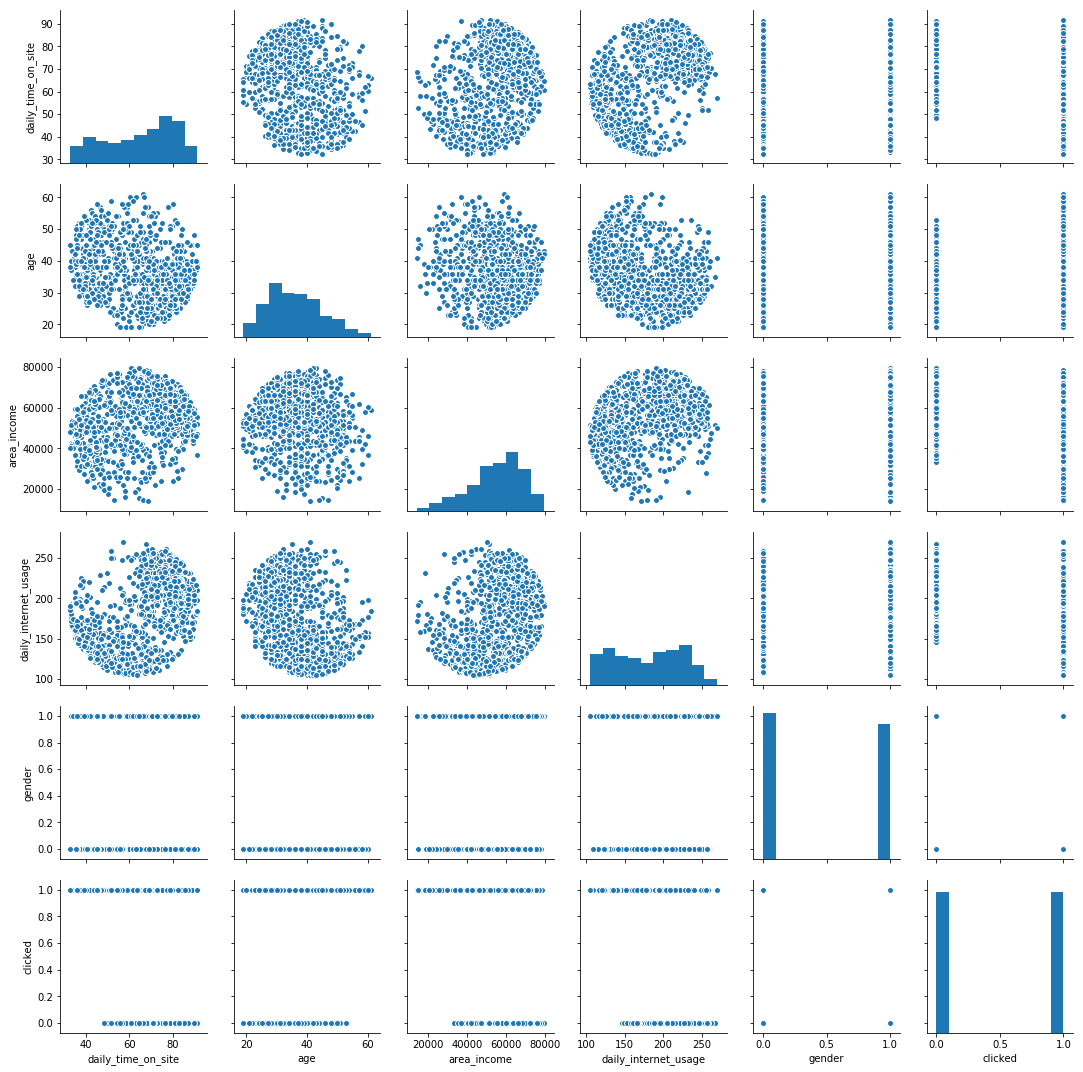

In [78]:
sns.pairplot(advertising)
sns.plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D3FE675B38>,
      dtype=object)

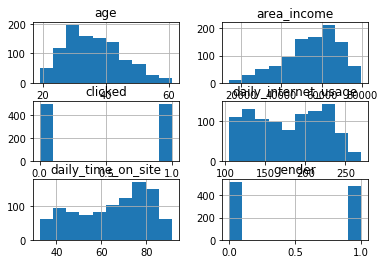

In [52]:
%matplotlib inline
advertising.hist() # histogram over the float and integer variables

clicked
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

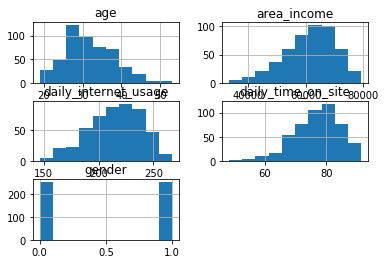

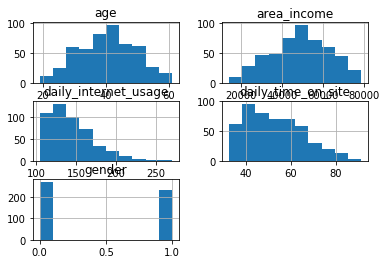

In [53]:
advertising.groupby('clicked').hist() #there seems to be some major differences on age, area income, daily internet usage
#daily time spent on site and gender between teh groups that clicked on the ad and the ones that did not


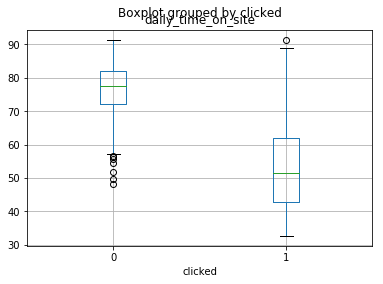

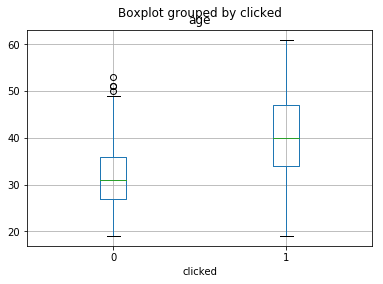

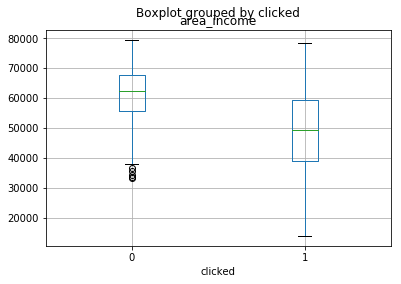

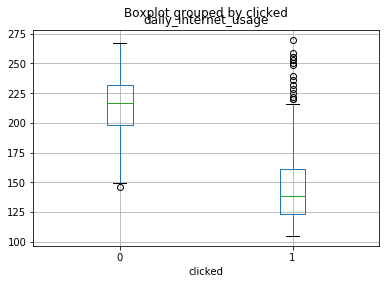

In [54]:
# a more clear way to look at this via boxplot of time spent, age, area income, usage, vs. click
advertising.boxplot(column = 'daily_time_on_site', by = 'clicked')
advertising.boxplot(column = 'age', by = 'clicked')
advertising.boxplot(column = 'area_income', by = 'clicked')
advertising.boxplot(column = 'daily_internet_usage', by = 'clicked')

In [ ]:
#frequency table between gender and click on ad
gender_click_crosstab = pd.crosstab(advertising['gender'], advertising['clicked'])
gender_click_crosstab

(<matplotlib.figure.Figure at 0x2d3fbfe5550>,
 OrderedDict([(('0', '0'), (0.0, 0.0, 0.5164179104477613, 0.4800952508977781)),
              (('0', '1'),
               (0.0,
                0.48341751003399075,
                0.5164179104477613,
                0.5165824899660093)),
              (('1', '0'),
               (0.5213930348258707,
                0.0,
                0.4786069651741294,
                0.5180237738377274)),
              (('1', '1'),
               (0.5213930348258707,
                0.5213460329739399,
                0.4786069651741294,
                0.47865396702606))]))

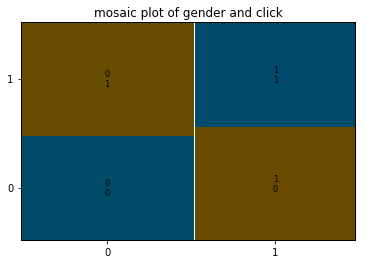

In [21]:
mosaic(advertising,['Male','Clicked on Ad'], axes_label = True, statistic = True, title = "mosaic plot of gender and click")
#gender does seem to have an effect on whether the ad was clicked on however it it yet to determine whether the difference
# is significant

summary from visualization: remove city and country as part of the effective variables due to the unique counts. build models with 
considerations of the high to moderate correlation among the 5 ariables. gender, daily_time_on_site, area_income, daily_internet

thoughts: feature engineer with time of the day with the time stamp data and try to see term frequency matrix of the top n words can be used as a feature.
